<a href="https://colab.research.google.com/github/CatIsOutOfTheBag/PetDA/blob/main/Human_Education_UK_used_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data set on Google Drive:
https://drive.google.com/file/d/1hj_NWyQ3yMDT02RUuqV194gV2KBHnUIc/view?usp=sharing

Data set on Kaggle:
https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes

# Data download

In [ ]:
! gdown 1hj_NWyQ3yMDT02RUuqV194gV2KBHnUIc

Downloading...
From: https://drive.google.com/uc?id=1hj_NWyQ3yMDT02RUuqV194gV2KBHnUIc
To: /content/UK-used-cars.zip
100% 1.15M/1.15M [00:00<00:00, 86.7MB/s]


In [ ]:
! unzip /content/UK-used-cars.zip -d /content/UK_used_cars


Archive:  /content/UK-used-cars.zip
  inflating: /content/UK_used_cars/audi.csv  
  inflating: /content/UK_used_cars/bmw.csv  
  inflating: /content/UK_used_cars/cclass.csv  
  inflating: /content/UK_used_cars/focus.csv  
  inflating: /content/UK_used_cars/ford.csv  
  inflating: /content/UK_used_cars/hyundi.csv  
  inflating: /content/UK_used_cars/merc.csv  
  inflating: /content/UK_used_cars/skoda.csv  
  inflating: /content/UK_used_cars/toyota.csv  
  inflating: /content/UK_used_cars/unclean cclass.csv  
  inflating: /content/UK_used_cars/unclean focus.csv  
  inflating: /content/UK_used_cars/vauxhall.csv  
  inflating: /content/UK_used_cars/vw.csv  


In [ ]:
import pandas as pd
df = pd.read_csv('/content/UK_used_cars/bmw.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


#Человекческое обучение - разработка алгоритма=неких правил
Определение цены авто по фичам

In [ ]:
len(df)

10781

# Обучающая и тестовая выборки

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df, train_size=0.25, random_state=42)

In [ ]:
len(train)+len(test)

10781

In [ ]:
len(test)/len(df)

0.7500231889435117

# Анализ данных

In [ ]:
train.isna().mean()

model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64

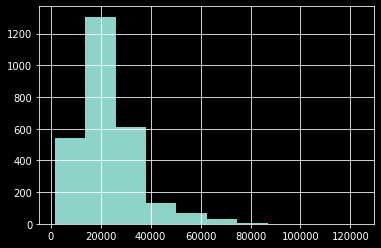

In [ ]:
# предположение. чем новее машина, тем дороже
import matplotlib.pyplot as plt
plt.style.use('dark_background')
train['price'].hist()
# распределение с жирным хвостом

In [ ]:
train['price'].describe()

count      2695.000000
mean      22865.506494
std       11950.102832
min        1550.000000
25%       14792.000000
50%       19998.000000
75%       27943.500000
max      123456.000000
Name: price, dtype: float64

In [ ]:
train.groupby('year')['price'].agg(['count', 'mean', 'median'])

,count,mean,median
year,,,
1999,2,3972.500000,3972.5
2000,1,1550.000000,1550.0
2002,1,2990.000000,2990.0
2004,4,10835.000000,10672.5
2005,2,6749.000000,6749.0
2006,4,3596.000000,3295.0
2007,5,6033.800000,5994.0
2008,7,6242.000000,4250.0
2009,10,5445.000000,4815.0


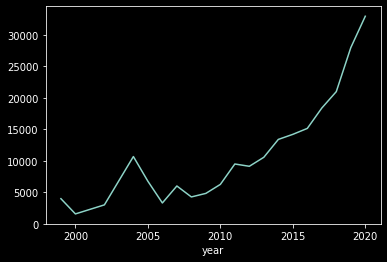

In [ ]:
train.groupby('year')['price'].median().plot()

# Baseline - начальный алгоритм

In [ ]:
# самое простое - предсказывать среднее или медиану
train['price_pred_mean'] = train['price'].mean() # константное предсказание

In [ ]:
train['err'] = train['price_pred_mean'] - train['price']

In [ ]:
train['err'].mean() 

1.0799194974669278e-12

In [ ]:
train['err_abs'] = abs(train['err'])

In [ ]:
train['err_abs'].mean() # MAE


8756.316160277569

In [ ]:
train['err_abs_pc'] = train['err_abs'] / train['price'] # MAPE

In [ ]:
train['err_abs_pc'].mean()

0.4986730524801684

In [ ]:
# если вместо среднего использовать медиану
train['price_pred_median'] = train['price'].median() # константное предсказание


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
def print_errors(y_true, y_pred):
  print(mean_absolute_error(y_true, y_pred))
  print(mean_absolute_percentage_error(y_true, y_pred))
  

In [ ]:
print_errors(train['price'], train['price_pred_mean'])
print_errors(train['price'], train['price_pred_median'])

8756.316160277569
0.4986730524801684
8451.642300556587
0.42339052630231705


In [ ]:
# теперь median - наш baseline

In [ ]:
# проверяем на тесте
test['price_pred_median'] = train['price'].median() # константное предсказание
# внимание, значения в тест кладем из трейна, так как мы не знаем цены в тесте!
print_errors(test['price'], test['price_pred_median'])


8141.0090279495425
0.4117422136605052


# Алгоритм на основе года - 
предсказываем машине среднее по году

In [ ]:
model_year_mean = train.groupby('year')['price'].mean().reset_index() # модель

In [ ]:
model_year_mean

,year,price
0,1999,3972.500000
1,2000,1550.000000
2,2002,2990.000000
3,2004,10835.000000
4,2005,6749.000000
5,2006,3596.000000
6,2007,6033.800000
7,2008,6242.000000
8,2009,5445.000000
9,2010,7505.000000


In [ ]:
# приджойним нашу модель по году к нашему датафрейму

In [ ]:
# сначала переименуем колонку с ценой
model_year_mean.columns = ['year', 'price_pred_year_mean']
# теперь приджойним полученную таблицу к нашему датафрейму
train.merge(model_year_mean, how='left', on='year')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pc,price_pred_median,price_pred_year_mean
0,3 Series,2020,31990,Semi-Auto,11,Petrol,145,40.4,2.0,22865.506494,-9124.493506,9124.493506,0.285230,19998.0,36440.906736
1,4 Series,2015,16980,Semi-Auto,27142,Diesel,30,65.7,2.0,22865.506494,5885.506494,5885.506494,0.346614,19998.0,15626.066406
2,X1,2016,16995,Automatic,44016,Diesel,150,55.4,2.0,22865.506494,5870.506494,5870.506494,0.345426,19998.0,16140.737443
3,X2,2018,23450,Semi-Auto,11594,Diesel,145,58.9,2.0,22865.506494,-584.493506,584.493506,0.024925,19998.0,23194.017467
4,X3,2014,15590,Automatic,51362,Diesel,145,54.3,2.0,22865.506494,7275.506494,7275.506494,0.466678,19998.0,13681.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2690,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22865.506494,4870.506494,4870.506494,0.270659,19998.0,23194.017467
2691,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22865.506494,2915.506494,2915.506494,0.146141,19998.0,16140.737443
2692,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22865.506494,-2584.493506,2584.493506,0.101552,19998.0,31496.328144
2693,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22865.506494,3015.506494,3015.506494,0.151915,19998.0,16140.737443


In [ ]:
train = train.merge(model_year_mean, how='left', on='year')

In [ ]:
print_errors(train['price'], train['price_pred_median']) # предыдущее значение, чтобы отследить улучшение
print_errors(train['price'], train['price_pred_year_mean'])

8451.642300556587
0.42339052630231705
5684.382251258833
0.2506165069018403


In [ ]:
# теперь на тесте
test =  test.merge(model_year_mean, how='left', on='year')

In [ ]:
# проверим нет ли пропусков(вдруг какие-то года не попали)
test.isna().mean()

model                   0.000000
year                    0.000000
price                   0.000000
transmission            0.000000
mileage                 0.000000
fuelType                0.000000
tax                     0.000000
mpg                     0.000000
engineSize              0.000000
price_pred_median       0.000000
price_pred_year_mean    0.000989
dtype: float64

In [ ]:
len(test)

8086

In [ ]:
set(train['year'].values)

{1999,
 2000,
 2002,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020}

In [ ]:
test[test['price_pred_year_mean'].isna()*1 == 1] # видим, что в тесте есть годы, которых нет в трейне
# это старые авто до 2003 года.
# чтобы любые тестовые данные попадали к нам в датасет по годам,
# разобьем года на группы

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean
2989,5 Series,1996,5995,Automatic,36000,Petrol,270,26.4,2.8,19998.0,NaN
3204,3 Series,2001,3050,Automatic,90000,Petrol,325,27.7,3.0,19998.0,NaN
3597,1 Series,2001,13000,Manual,22633,Petrol,125,53.3,0.0,19998.0,NaN
4115,5 Series,2003,14950,Automatic,37000,Petrol,325,26.4,3.0,19998.0,NaN
4141,Z3,1998,3950,Manual,56500,Petrol,270,35.3,1.9,19998.0,NaN
5001,Z3,1997,3950,Manual,49000,Petrol,270,35.3,1.9,19998.0,NaN
7127,Z3,2001,5950,Manual,60000,Petrol,325,30.7,2.2,19998.0,NaN
7276,Z4,2003,3495,Automatic,70000,Petrol,325,29.7,3.0,19998.0,NaN


In [ ]:
test.sort_values('year').head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean
2989,5 Series,1996,5995,Automatic,36000,Petrol,270,26.4,2.8,19998.0,NaN
5001,Z3,1997,3950,Manual,49000,Petrol,270,35.3,1.9,19998.0,NaN
4141,Z3,1998,3950,Manual,56500,Petrol,270,35.3,1.9,19998.0,NaN
5765,Z3,1999,3995,Manual,51949,Petrol,255,35.3,1.9,19998.0,3972.5
415,3 Series,1999,1200,Automatic,82000,Petrol,245,31.0,2.8,19998.0,3972.5


In [ ]:
train.groupby('year')['price'].agg(['count', 'mean'])
# цена до 2012 была в среднем ниже 10000
# с 2013 по 2018 ниже 25000
# дальше выше
# попробуем разбить на 3 группы

,count,mean
year,,
1999,2,3972.500000
2000,1,1550.000000
2002,1,2990.000000
2004,4,10835.000000
2005,2,6749.000000
2006,4,3596.000000
2007,5,6033.800000
2008,7,6242.000000
2009,10,5445.000000


In [ ]:
# разобьем года на группы в трейне
pd.cut(train['year'], [-float('inf'), 2000, 2005, 2010, 2015, 2018, float('inf')])

0          (2018.0, inf]
1       (2010.0, 2015.0]
2       (2015.0, 2018.0]
3       (2015.0, 2018.0]
4       (2010.0, 2015.0]
              ...       
2690    (2015.0, 2018.0]
2691    (2015.0, 2018.0]
2692       (2018.0, inf]
2693    (2015.0, 2018.0]
2694    (2015.0, 2018.0]
Name: year, Length: 2695, dtype: category
Categories (6, interval[float64, right]): [(-inf, 2000.0] < (2000.0, 2005.0] < (2005.0, 2010.0] <
                                           (2010.0, 2015.0] < (2015.0, 2018.0] < (2018.0, inf]]

In [ ]:
train['year_group'] = pd.cut(train['year'], [-float('inf'), 2000, 2005, 2010, 2015, 2018, float('inf')])

In [ ]:
train.groupby('year_group')['price'].agg(['count', 'mean'])

,count,mean
year_group,,
"(-inf, 2000.0]",3,3165.000000
"(2000.0, 2005.0]",7,8546.857143
"(2005.0, 2010.0]",34,5962.852941
"(2010.0, 2015.0]",506,13837.721344
"(2015.0, 2018.0]",1117,18814.739481
"(2018.0, inf]",1028,32424.639105


In [ ]:
t = train.groupby('year_group')['price'].agg(['count', 'mean'])
print(t['count'].sum())
print(len(train))
# ничего не упустили, все значения на месте

2695
2695


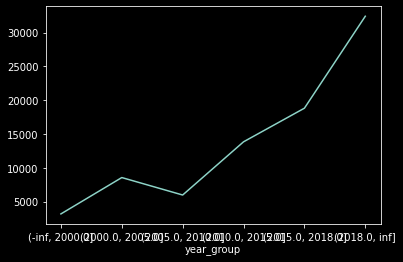

In [ ]:
train.groupby('year_group')['price'].mean().plot()


In [ ]:
# создадим новую интервальную по годам модель
model_year_mean_group = train.groupby('year_group')['price'].mean().reset_index()

In [ ]:
model_year_mean_group

,year_group,price
0,"(-inf, 2000.0]",3165.000000
1,"(2000.0, 2005.0]",8546.857143
2,"(2005.0, 2010.0]",5962.852941
3,"(2010.0, 2015.0]",13837.721344
4,"(2015.0, 2018.0]",18814.739481
5,"(2018.0, inf]",32424.639105


In [ ]:
# переименуем столбец price перед джойном
model_year_mean_group.columns = ['year_group', 'price_year_group']

In [ ]:
model_year_mean_group

,year_group,price_year_group
0,"(-inf, 2000.0]",3165.000000
1,"(2000.0, 2005.0]",8546.857143
2,"(2005.0, 2010.0]",5962.852941
3,"(2010.0, 2015.0]",13837.721344
4,"(2015.0, 2018.0]",18814.739481
5,"(2018.0, inf]",32424.639105


In [ ]:
train = train.merge(model_year_mean_group, how='left', on='year_group')

In [ ]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pc,price_pred_median,price_pred_year_mean,year_group,price_year_group
0,3 Series,2020,31990,Semi-Auto,11,Petrol,145,40.4,2.0,22865.506494,-9124.493506,9124.493506,0.285230,19998.0,36440.906736,"(2018.0, inf]",32424.639105
1,4 Series,2015,16980,Semi-Auto,27142,Diesel,30,65.7,2.0,22865.506494,5885.506494,5885.506494,0.346614,19998.0,15626.066406,"(2010.0, 2015.0]",13837.721344
2,X1,2016,16995,Automatic,44016,Diesel,150,55.4,2.0,22865.506494,5870.506494,5870.506494,0.345426,19998.0,16140.737443,"(2015.0, 2018.0]",18814.739481
3,X2,2018,23450,Semi-Auto,11594,Diesel,145,58.9,2.0,22865.506494,-584.493506,584.493506,0.024925,19998.0,23194.017467,"(2015.0, 2018.0]",18814.739481
4,X3,2014,15590,Automatic,51362,Diesel,145,54.3,2.0,22865.506494,7275.506494,7275.506494,0.466678,19998.0,13681.909091,"(2010.0, 2015.0]",13837.721344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2690,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22865.506494,4870.506494,4870.506494,0.270659,19998.0,23194.017467,"(2015.0, 2018.0]",18814.739481
2691,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22865.506494,2915.506494,2915.506494,0.146141,19998.0,16140.737443,"(2015.0, 2018.0]",18814.739481
2692,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22865.506494,-2584.493506,2584.493506,0.101552,19998.0,31496.328144,"(2018.0, inf]",32424.639105
2693,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22865.506494,3015.506494,3015.506494,0.151915,19998.0,16140.737443,"(2015.0, 2018.0]",18814.739481


In [ ]:
# посчитаем ошибку на новой модели
print_errors(train['price'], train['price_year_group'])

5986.9793460318415
0.2749687207323899


In [ ]:
# а это на предыдущем трейне
print_errors(train['price'], train['price_pred_year_mean'])

5684.382251258833
0.2506165069018403


In [ ]:
# в тесте так же разобьем года на промежутки
test['year_group'] = pd.cut(test['year'], [-float('inf'), 2000, 2005, 2010, 2015, 2018, float('inf')])
# приджойним
test = test.merge(model_year_mean_group, how='left', on='year_group')
# посчитаем ошибку 
print_errors(test['price'], test['price_year_group'])

5777.069214125304
0.2719404250456943


In [ ]:
# есть потеря качества модели, в будущем можно попробовать более мелкое разбиение

In [ ]:
# теперь попробуем медиану вместо среднего
train.groupby('year_group')['price'].agg(['count', 'median'])

,count,median
year_group,,
"(-inf, 2000.0]",3,3950.0
"(2000.0, 2005.0]",7,3495.0
"(2005.0, 2010.0]",34,5244.5
"(2010.0, 2015.0]",506,12945.5
"(2015.0, 2018.0]",1117,17898.0
"(2018.0, inf]",1028,28990.0


In [ ]:
model_year_median_group = train.groupby('year_group')['price'].median().reset_index()
model_year_median_group


,year_group,price
0,"(-inf, 2000.0]",3950.0
1,"(2000.0, 2005.0]",3495.0
2,"(2005.0, 2010.0]",5244.5
3,"(2010.0, 2015.0]",12945.5
4,"(2015.0, 2018.0]",17898.0
5,"(2018.0, inf]",28990.0


In [ ]:
model_year_median_group.columns = ['year_group', 'price_year_group_median']
model_year_median_group

,year_group,price_year_group_median
0,"(-inf, 2000.0]",3950.0
1,"(2000.0, 2005.0]",3495.0
2,"(2005.0, 2010.0]",5244.5
3,"(2010.0, 2015.0]",12945.5
4,"(2015.0, 2018.0]",17898.0
5,"(2018.0, inf]",28990.0


In [ ]:
train = train.merge(model_year_median_group, how='left', on='year_group')

In [ ]:
print_errors(train['price'], train['price_year_group_median'])

5748.2059369202225
0.24393051680209013


In [ ]:
# проверяем на тесте
# приджойним
test = test.merge(model_year_median_group, how='left', on='year_group')
# посчитаем ошибку 
print_errors(test['price'], test['price_year_group_median'])

5444.061464259214
0.2376300651451399


In [ ]:
# удалось уменьшить ошибку, используя медиану

# ------------------------ NEW BASELINE ------------------------------

# Добавим еще переменных

Предположение:
чем больше объем двигателя, тем дороже автомобиль

In [ ]:
train.groupby(['engineSize'])[['price', 'year']].agg(['count', 'mean', 'median'])

price                         year                     
           count          mean   median count         mean  median
engineSize                                                        
0.0           10  19290.800000  17990.5    10  2016.300000  2017.0
0.6            1  19500.000000  19500.0     1  2017.000000  2017.0
1.0            1  17400.000000  17400.0     1  2015.000000  2015.0
1.5          389  17073.866324  15700.0   389  2017.547558  2017.0
1.6           25   9230.120000   8490.0    25  2013.760000  2014.0
1.9            2   3972.500000   3972.5     2  1999.000000  1999.0
2.0         1602  20645.681024  19775.0  1602  2017.036829  2017.0
2.5            4   2633.500000   2744.5     4  2002.750000  2003.0
3.0          639  32142.748044  27947.0   639  2017.148670  2017.0
3.2            3  16116.333333  17850.0     3  2004.333333  2004.0
4.0            2  18674.500000  18674.5     2  2011.500000  2011.5
4.4           17  47204.176471  46995.0    17  2017.000000  2017.0

In [ ]:
# заметен рост цены в наиболее крупных категориях
# сгруппируем эту фичу
train['engineSize_group'] = pd.cut(train['engineSize'], [-float('inf'), 1.5, 2, float('inf')])

In [ ]:
train.groupby('engineSize_group')['price'].agg(['count', 'mean', 'median'])

,count,mean,median
engineSize_group,,,
"(-inf, 1.5]",401,17136.014963,15750.0
"(1.5, 2.0]",1629,20450.017802,19500.0
"(2.0, inf]",665,32237.472180,27990.0


In [ ]:
# проверим, что все строки заполнились
t = train.groupby('engineSize_group')['price'].agg(['count', 'mean', 'median'])
print(t['count'].sum())
print(len(train))

2695
2695


In [ ]:
# Построим тепловую карту для зависимости цены от года выпуска авто и объема двигателя
t = train.pivot_table(index='year_group', columns='engineSize_group', values='price', aggfunc='median')

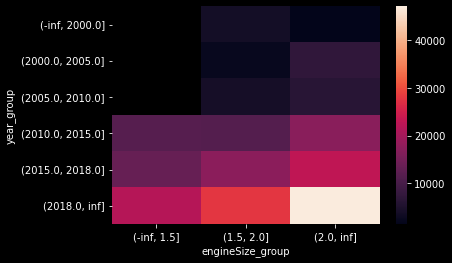

In [ ]:
import seaborn as sns
sns.heatmap(t)

In [ ]:
# из тепловой карты ярко видна зависимость: чем новее машина и больше двигатель, тем она дороже

In [ ]:
train.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'price_pred_mean', 'err', 'err_abs', 'err_abs_pc',
       'price_pred_median', 'price_pred_year_mean', 'year_group',
       'price_year_group', 'price_year_group_median', 'engineSize_group'],
      dtype='object')

Соберем модель с двумя фичами

In [ ]:
model_year_engine_median = train.groupby(['year_group', 'engineSize_group'])['price'].median().reset_index()


In [ ]:
model_year_engine_median = model_year_engine_median.rename({'price': 'price_year_engine_median'}, axis=1)
model_year_engine_median

,year_group,engineSize_group,price_year_engine_median
0,"(-inf, 2000.0]","(-inf, 1.5]",NaN
1,"(-inf, 2000.0]","(1.5, 2.0]",3972.5
2,"(-inf, 2000.0]","(2.0, inf]",1550.0
3,"(2000.0, 2005.0]","(-inf, 1.5]",NaN
4,"(2000.0, 2005.0]","(1.5, 2.0]",2495.0
5,"(2000.0, 2005.0]","(2.0, inf]",7247.0
6,"(2005.0, 2010.0]","(-inf, 1.5]",NaN
7,"(2005.0, 2010.0]","(1.5, 2.0]",4195.0
8,"(2005.0, 2010.0]","(2.0, inf]",6495.0
9,"(2010.0, 2015.0]","(-inf, 1.5]",11679.0


# важно
джойним две фичи по двум ключам

In [ ]:
train.merge(model_year_engine_median,how='left', on=['year_group', 'engineSize_group'])

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pc,price_pred_median,price_pred_year_mean,year_group,price_year_group,price_year_group_median,engineSize_group,price_year_engine_median
0,3 Series,2020,31990,Semi-Auto,11,Petrol,145,40.4,2.0,22865.506494,-9124.493506,9124.493506,0.285230,19998.0,36440.906736,"(2018.0, inf]",32424.639105,28990.0,"(1.5, 2.0]",27980.0
1,4 Series,2015,16980,Semi-Auto,27142,Diesel,30,65.7,2.0,22865.506494,5885.506494,5885.506494,0.346614,19998.0,15626.066406,"(2010.0, 2015.0]",13837.721344,12945.5,"(1.5, 2.0]",11500.0
2,X1,2016,16995,Automatic,44016,Diesel,150,55.4,2.0,22865.506494,5870.506494,5870.506494,0.345426,19998.0,16140.737443,"(2015.0, 2018.0]",18814.739481,17898.0,"(1.5, 2.0]",17498.0
3,X2,2018,23450,Semi-Auto,11594,Diesel,145,58.9,2.0,22865.506494,-584.493506,584.493506,0.024925,19998.0,23194.017467,"(2015.0, 2018.0]",18814.739481,17898.0,"(1.5, 2.0]",17498.0
4,X3,2014,15590,Automatic,51362,Diesel,145,54.3,2.0,22865.506494,7275.506494,7275.506494,0.466678,19998.0,13681.909091,"(2010.0, 2015.0]",13837.721344,12945.5,"(1.5, 2.0]",11500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2690,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22865.506494,4870.506494,4870.506494,0.270659,19998.0,23194.017467,"(2015.0, 2018.0]",18814.739481,17898.0,"(1.5, 2.0]",17498.0
2691,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22865.506494,2915.506494,2915.506494,0.146141,19998.0,16140.737443,"(2015.0, 2018.0]",18814.739481,17898.0,"(2.0, inf]",22990.5
2692,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22865.506494,-2584.493506,2584.493506,0.101552,19998.0,31496.328144,"(2018.0, inf]",32424.639105,28990.0,"(1.5, 2.0]",27980.0
2693,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22865.506494,3015.506494,3015.506494,0.151915,19998.0,16140.737443,"(2015.0, 2018.0]",18814.739481,17898.0,"(1.5, 2.0]",17498.0


In [ ]:
train = train.merge(model_year_engine_median,how='left', on=['year_group', 'engineSize_group'])


In [ ]:
print_errors(train['price'], train['price_year_engine_median'])

4134.607050092764
0.18383652339559026


In [ ]:
# проверим качество на тесте
test['engineSize_group'] = pd.cut(test['engineSize'], [-float('inf'), 1.5, 2, float('inf')])

In [ ]:
test = test.merge(model_year_engine_median,how='left', on=['year_group', 'engineSize_group'])

In [ ]:
test.isna().mean()

model                       0.000000
year                        0.000000
price                       0.000000
transmission                0.000000
mileage                     0.000000
fuelType                    0.000000
tax                         0.000000
mpg                         0.000000
engineSize                  0.000000
price_pred_median           0.000000
price_pred_year_mean        0.000989
year_group                  0.000000
price_year_group            0.000000
price_year_group_median     0.000000
engineSize_group            0.000000
price_year_engine_median    0.000124
dtype: float64

In [ ]:
test[test['price_year_engine_median'].isna()] # машины с таким двигателем и такого года не было в трейне

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean,year_group,price_year_group,price_year_group_median,engineSize_group,price_year_engine_median
3597,1 Series,2001,13000,Manual,22633,Petrol,125,53.3,0.0,19998.0,NaN,"(2000.0, 2005.0]",8546.857143,3495.0,"(-inf, 1.5]",NaN


In [ ]:
# пока что посчитаем качество без этого авто
test_no_nan = test.dropna().copy()
print_errors(test_no_nan['price'], test_no_nan['price_year_engine_median'])

3986.3034785838076
0.18190914336183855


# Улучшение модели

In [ ]:
# попробуем добавить трансмиссию
train.columns
train.groupby('transmission')['price'].agg(['count', 'mean', 'median'])

,count,mean,median
transmission,,,
Automatic,896,22627.371652,19500.0
Manual,639,14389.572770,13300.0
Semi-Auto,1160,27718.515517,24995.0


In [ ]:
len(model_year_engine_median)

18

In [ ]:
# если добавить трансмиссию в модель, она увеличится в 3 раза
model_year_engine_trn_median = train.groupby(['year_group', 
                                              'engineSize_group', 
                                              'transmission'])['price'].median().reset_index()


In [ ]:
model_year_engine_trn_median
# NaN-ы появляются когда в категории нет автомобилей

,year_group,engineSize_group,transmission,price
0,"(-inf, 2000.0]","(-inf, 1.5]",Automatic,NaN
1,"(-inf, 2000.0]","(-inf, 1.5]",Manual,NaN
2,"(-inf, 2000.0]","(-inf, 1.5]",Semi-Auto,NaN
3,"(-inf, 2000.0]","(1.5, 2.0]",Automatic,NaN
4,"(-inf, 2000.0]","(1.5, 2.0]",Manual,3972.5
5,"(-inf, 2000.0]","(1.5, 2.0]",Semi-Auto,NaN
6,"(-inf, 2000.0]","(2.0, inf]",Automatic,1550.0
7,"(-inf, 2000.0]","(2.0, inf]",Manual,NaN
8,"(-inf, 2000.0]","(2.0, inf]",Semi-Auto,NaN
9,"(2000.0, 2005.0]","(-inf, 1.5]",Automatic,NaN


# Изменение настроек пандас, чтобы расширить диапазон показываемых строк таблицы

In [ ]:
pd.options.display.max_rows = 999

Внимание
джойним по трем ключам

In [ ]:
model_year_engine_trn_median = model_year_engine_trn_median.rename({'price': 'price_year_engine_trn_median'}, axis=1)

In [ ]:
train = train.merge(model_year_engine_trn_median, how='left', on=['year_group', 
                                              'engineSize_group', 
                                              'transmission'])

In [ ]:
print_errors(train['price'], train['price_year_engine_trn_median'])

3880.6582560296847
0.16712081436905019


In [ ]:
# есть улучшение. проверим на тесте
test.merge(model_year_engine_trn_median,how='left', on=['year_group', 'engineSize_group', 'transmission'])


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean,year_group,price_year_group,price_year_group_median,engineSize_group,price_year_engine_median,price_year_engine_trn_median
0,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,19998.0,23194.017467,"(2015.0, 2018.0]",18814.739481,17898.0,"(-inf, 1.5]",13579.5,12299.0
1,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,19998.0,13681.909091,"(2010.0, 2015.0]",13837.721344,12945.5,"(1.5, 2.0]",11500.0,14396.5
2,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,19998.0,31496.328144,"(2018.0, inf]",32424.639105,28990.0,"(2.0, inf]",46990.0,47924.0
3,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,19998.0,31496.328144,"(2018.0, inf]",32424.639105,28990.0,"(-inf, 1.5]",21882.5,21715.0
4,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,19998.0,23194.017467,"(2015.0, 2018.0]",18814.739481,17898.0,"(-inf, 1.5]",13579.5,12299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8081,M4,2019,42485,Semi-Auto,5486,Petrol,145,34.0,3.0,19998.0,31496.328144,"(2018.0, inf]",32424.639105,28990.0,"(2.0, inf]",46990.0,47924.0
8082,3 Series,2014,13990,Automatic,45000,Diesel,30,62.8,2.0,19998.0,13681.909091,"(2010.0, 2015.0]",13837.721344,12945.5,"(1.5, 2.0]",11500.0,11999.0
8083,5 Series,2016,20000,Semi-Auto,46367,Diesel,165,50.4,3.0,19998.0,16140.737443,"(2015.0, 2018.0]",18814.739481,17898.0,"(2.0, inf]",22990.5,22994.5
8084,3 Series,2015,14952,Manual,31828,Petrol,200,43.5,2.0,19998.0,15626.066406,"(2010.0, 2015.0]",13837.721344,12945.5,"(1.5, 2.0]",11500.0,9992.5


In [ ]:
test = test.merge(model_year_engine_trn_median,how='left', 
                  on=['year_group', 'engineSize_group', 'transmission'])


In [ ]:
test.isna().mean()

model                           0.000000
year                            0.000000
price                           0.000000
transmission                    0.000000
mileage                         0.000000
fuelType                        0.000000
tax                             0.000000
mpg                             0.000000
engineSize                      0.000000
price_pred_median               0.000000
price_pred_year_mean            0.000989
year_group                      0.000000
price_year_group                0.000000
price_year_group_median         0.000000
engineSize_group                0.000000
price_year_engine_median        0.000124
price_year_engine_trn_median    0.000989
dtype: float64

In [ ]:
# пропуски дропнем (а можем придумать, что поставить на их места)
test_no_na = test.dropna().copy()

In [ ]:
print_errors(test_no_na['price'], test_no_na['price_year_engine_trn_median'])

3774.099182257465
0.16627979141779023


По итогу имеем rool-based модель, ручную. Мы вырабтали правила при человеческом обучении